In [34]:
from numpy import random   
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [62]:
data = pd.read_csv('/Users/jesshuang/Documents/GitHub/jess_window/machine_learning/boston_housing_prices/train_dataset.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [63]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT,PRICE
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,3.989784,10.912088,11.664110,0.072527,0.561758,6.263266,70.344835,3.664227,10.092308,420.778022,18.519780,353.272593,12.963385,22.212308
std,8.993398,23.130233,6.974787,0.259645,0.118627,0.704493,27.697196,2.118137,9.002217,172.326926,2.165215,95.557626,7.239069,9.241754
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,6.500000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.084170,0.000000,5.190000,0.000000,0.453000,5.877500,47.200000,2.005550,4.000000,281.000000,17.400000,372.860000,7.205000,16.450000
50%,0.289600,0.000000,10.010000,0.000000,0.538000,6.193000,81.300000,2.894400,5.000000,358.000000,19.100000,391.450000,11.690000,20.800000
75%,4.548895,0.000000,18.100000,0.000000,0.647000,6.611000,94.650000,4.812200,24.000000,666.000000,20.200000,396.375000,17.200000,24.800000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [64]:
d = pd.DataFrame(data,columns=['PRICE'])
d.describe()

,PRICE
count,455.000000
mean,22.212308
std,9.241754
min,5.000000
25%,16.450000
50%,20.800000
75%,24.800000
max,50.000000


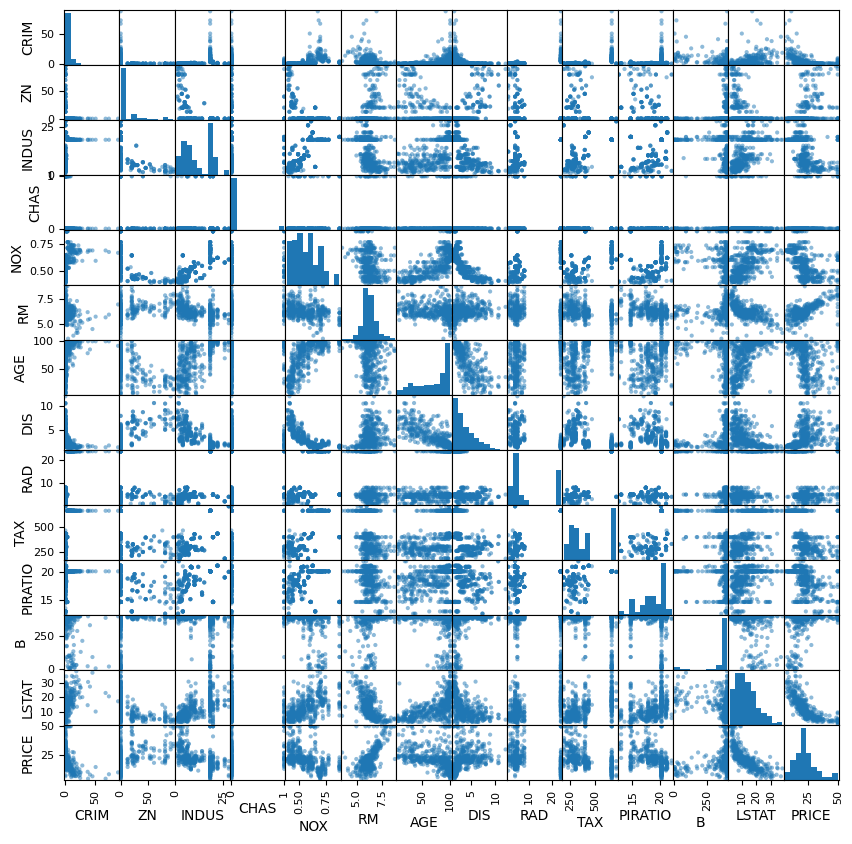

In [65]:
from pandas.plotting import scatter_matrix

_=scatter_matrix(data, figsize=(10,10))

In [66]:
Q1=data['PRICE'].quantile(0.25)
Q3=data['PRICE'].quantile(0.75)
IQR=Q3-Q1
Upper=Q3+1.5*IQR
Lower=Q1-1.5*IQR
print('Q3=',Q3,'Q1=',Q1,'IQR=',IQR,'Upper=',Upper,'Lower=',Lower)

Q3= 24.8 Q1= 16.45 IQR= 8.350000000000001 Upper= 37.325 Lower= 3.924999999999997


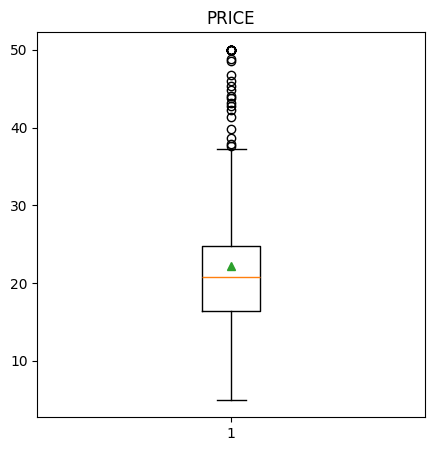

In [67]:
plt.figure(figsize=(5,5))
plt.boxplot(d,showmeans=True)
plt.title('PRICE')
plt.show()

/var/folders/z_/tp2bb4193xgdzr3fvyjyr6zm0000gn/T/ipykernel_77258/178111710.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d)


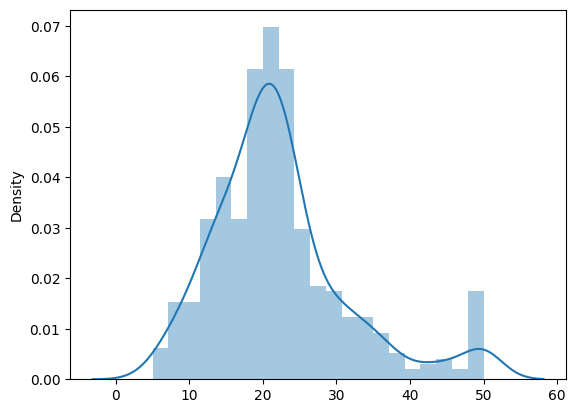

In [68]:
sns.distplot(d)
plt.show()

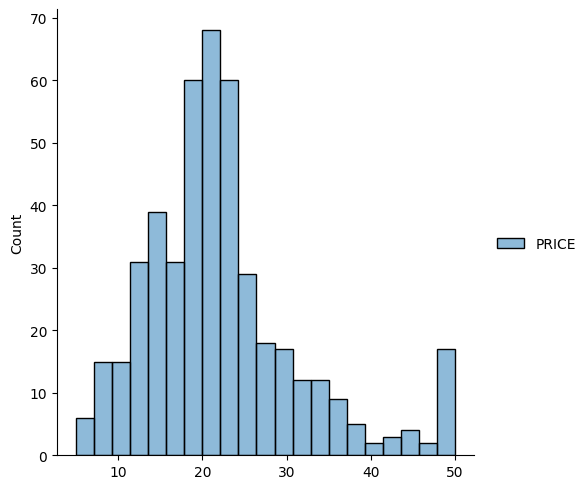

In [69]:
sns.displot(d)
plt.show()

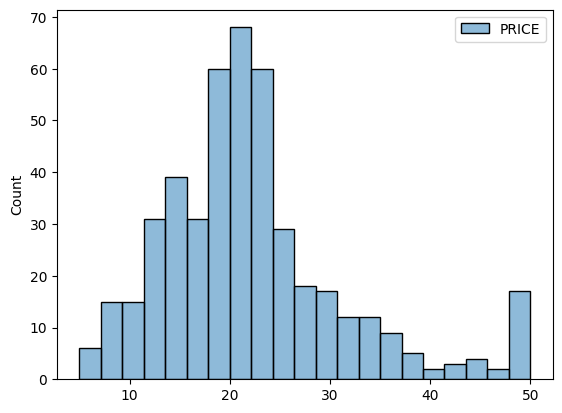

In [70]:
sns.histplot(d)
plt.show()

In [71]:
#skewness and kurtosis
print("偏態 Skewness: {:.2f}".format(d['PRICE'].skew()))
print("峰度 Kurtosis: {:.2f}".format(d['PRICE'].kurt()))

偏態 Skewness: 1.14
峰度 Kurtosis: 1.60


/var/folders/z_/tp2bb4193xgdzr3fvyjyr6zm0000gn/T/ipykernel_77258/3320564587.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(exp_data)


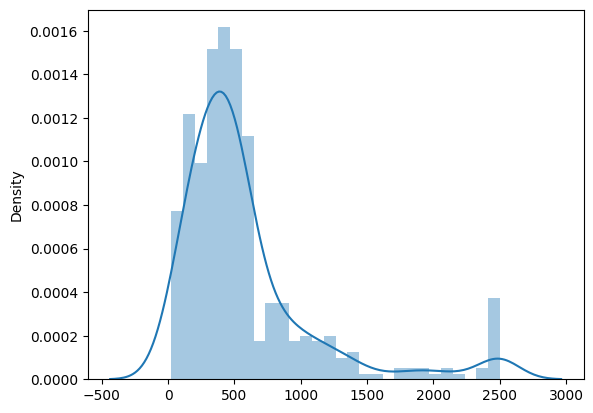

In [72]:
exp_data = np.power(d, 2)
exp_data = exp_data.replace([np.inf, -np.inf, -0], 0)
sns.distplot(exp_data)
plt.show()

In [73]:
# print ("Shape Of The Before Ouliers: ",d.shape)
# n=1.5
# #IQR = Q3-Q1
# IQR = np.percentile(d,75) - np.percentile(d,25)
# #outlier = Q3 + n*IQR
# d=d[d < np.percentile(d,75)+n*IQR]
# #outlier = Q1 - n*IQR
# d=d[d > np.percentile(d,25)-n*IQR]
# print ("Shape Of The After Ouliers: ",data.shape)

Shape Of The Before Ouliers:  (455, 1)
Shape Of The After Ouliers:  (455, 14)
